In [1]:
from quests_data import *
import itertools
import seaborn as sns
from scipy import stats
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

from quests.tools.plotting import savefig, COLORS

## Loading the precomputed data

In [2]:
ROOT_DIR = "../data/04-TM23/csv"
dH = pd.read_csv(f"{ROOT_DIR}/dH.csv", index_col=0)
df = pd.read_csv(f"{ROOT_DIR}/full.csv", index_col=0)
entropy = pd.read_csv(f"{ROOT_DIR}/entropy.csv", index_col=0)
lcv = pd.read_csv(f"{ROOT_DIR}/learning.csv", index_col=0)
vols = pd.read_csv(f"{ROOT_DIR}/volumes.csv", index_col=0)
nequip = pd.read_csv(f"{ROOT_DIR}/nequip.csv", index_col=0)

In [3]:
ELEMENTS = df.sort_values(["row", "group"]).index.values.reshape(3, 9)

In [4]:
i = lcv.groupby("element").idxmax()
gap = lcv.loc[i["n_samples"]].set_index("element")
df["gap"] = gap["gap"]

In [5]:
df["efficiency"] = 100 * df["entropy"] / df["logn"]

## Defining functions for the analysis

In [6]:
def plot_table(matrix, cbar_label):
    fig, ax = plt.subplots(figsize=(6.5, 1.8))

    elmat = ELEMENTS
    
    sns.heatmap(
        matrix,
        ax=ax,
        cbar_kws={"label": cbar_label},
        cmap="viridis",
        # annot=True,
        # fmt=".1f",
    )
    
    for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
        ax.annotate(
            f"{matrix[i, j]:.1f}",
            (j + 0.5, i + 0.75),
            fontsize=12,
            ha="center",
            va="center",
            color="w",
        )
    
        ax.annotate(
            f"{elmat[i, j]}",
            (j + 0.5, i + 0.35),
            fontsize=14,
            ha="center",
            va="center",
            color="w",
        )
    
    ax.set_yticks([])
    ax.set_xticks([])
    ax.set_aspect("equal")
    
    return fig, ax


def get_structure_category(labels):
    RENAMER = {
        "fcc": 0,
        "bcc": 1,
        "hcp": 2,
    }
    return [
        RENAMER[f] for f in labels
    ]        

## Main Paper figure

### Tables

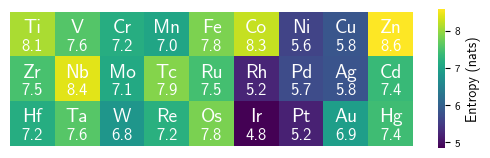

In [7]:
matrix = df.sort_values(["row", "group"])["entropy"].values.reshape(3, 9)
fig, ax = plot_table(matrix, cbar_label="Entropy (nats)")

# savefig(fig, "05-tm23-entropy-table.pdf", prefix=PREFIX)

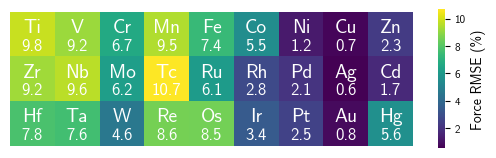

In [8]:
matrix = df.sort_values(["row", "group"])["Force_Pct"].values.reshape(3, 9)
fig, ax = plot_table(matrix, cbar_label="Force RMSE (%)")

# savefig(fig, "05-tm23-errors-table.pdf", prefix=PREFIX)

### Correlation plots

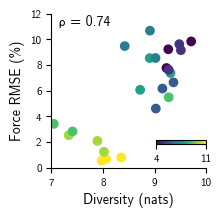

In [9]:
fig, ax = plt.subplots(figsize=(2.0, 2.0))

data = df[["diversity", "Force_Pct", "group", "dband"]].dropna()

x = data["diversity"]
y = data["Force_Pct"]
sc = ax.scatter(x, y, c=data["group"])

# for el, xs, ys in zip(df.index, _x, _y):
#     ax.annotate(el, (xs, ys))

r = stats.pearsonr(x, y)
ax.annotate(f"ρ = {r.statistic:.2f}", (0.05, 0.92), xycoords="axes fraction")

ax.set_xlim(7, 10)
ax.set_ylim(0, 12)
# ax.set_yscale("log")

cax = fig.add_axes([0.65, 0.23, 0.25, 0.02])
cbar = fig.colorbar(sc, cax=cax, orientation='horizontal')
cbar.set_ticks([4, 11])

ax.set_xlabel("Diversity (nats)")
ax.set_ylabel("Force RMSE (%)")
# savefig(fig, "05-tm23-corr-div.pdf", prefix=PREFIX)
plt.show()

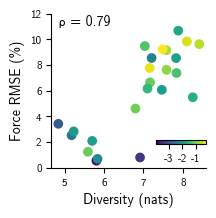

In [10]:
fig, ax = plt.subplots(figsize=(2.0, 2.0))

data = df[["entropy", "Force_Pct", "dband"]].dropna()

x = data["entropy"]
y = data["Force_Pct"]
sc = ax.scatter(x, y, c=data["dband"])

# for el, xs, ys in zip(df.index, _x, _y):
#     ax.annotate(el, (xs, ys))

r = stats.pearsonr(x, y)
ax.annotate(f"ρ = {r.statistic:.2f}", (0.05, 0.92), xycoords="axes fraction")

# ax.set_xlim(7, 10)
ax.set_ylim(0, 12)
# ax.set_yscale("log")

cax = fig.add_axes([0.65, 0.23, 0.25, 0.02])
cbar = fig.colorbar(sc, cax=cax, orientation='horizontal')

ax.set_xlabel("Diversity (nats)")
ax.set_ylabel("Force RMSE (%)")
# savefig(fig, "05-tm23-corr-entr.pdf", prefix=PREFIX)
plt.show()

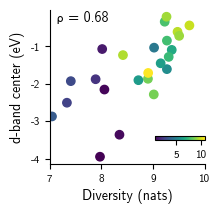

In [11]:
fig, ax = plt.subplots(figsize=(2.0, 2.0))

data = df[["diversity", "Force_Pct", "dband"]].dropna()

x = data["diversity"]
y = data["dband"]
sc = ax.scatter(x, y, c=data["Force_Pct"])

r = stats.pearsonr(x, y)
ax.annotate(f"ρ = {r.statistic:.2f}", (0.05, 0.92), xycoords="axes fraction")

ax.set_xlim(7, 10)
# ax.set_ylim(0, 12)
# ax.set_yscale("log")

cax = fig.add_axes([0.65, 0.23, 0.25, 0.02])
cbar = fig.colorbar(sc, cax=cax, orientation='horizontal')

ax.set_xlabel("Diversity (nats)")
ax.set_ylabel("d-band center (eV)")
# savefig(fig, "05-tm23-corr-dband.pdf", prefix=PREFIX)
plt.show()

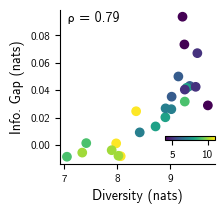

In [12]:
fig, ax = plt.subplots(figsize=(2.0, 2.0))

data = df[["entropy", "Force_Pct", "dband", "group", "gap", "diversity"]].dropna()

x = data["diversity"]
y = data["gap"]
sc = ax.scatter(x, y, c=data["group"])

# for el, xs, ys in zip(df.index, _x, _y):
#     ax.annotate(el, (xs, ys))

r = stats.pearsonr(x, y)
ax.annotate(f"ρ = {r.statistic:.2f}", (0.05, 0.92), xycoords="axes fraction")

# ax.set_xlim(7, 10)
# ax.set_ylim(0, 12)
# ax.set_yscale("log")

cax = fig.add_axes([0.65, 0.23, 0.25, 0.02])
cbar = fig.colorbar(sc, cax=cax, orientation='horizontal')

ax.set_xlabel("Diversity (nats)")
ax.set_ylabel("Info. Gap (nats)")
# savefig(fig, "05-tm23-corr-gap.pdf", prefix=PREFIX)
plt.show()

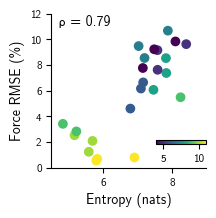

In [13]:
fig, ax = plt.subplots(figsize=(2.0, 2.0))

data = df[["entropy", "Force_Pct", "dband", "group", "gap", "diversity"]].dropna()

x = data["entropy"]
y = data["Force_Pct"]
sc = ax.scatter(x, y, c=data["group"])

# for el, xs, ys in zip(df.index, _x, _y):
#     ax.annotate(el, (xs, ys))

r = stats.pearsonr(x, y)
ax.annotate(f"ρ = {r.statistic:.2f}", (0.05, 0.92), xycoords="axes fraction")

ax.set_xlim(4.5, 9)
ax.set_ylim(0, 12)
# ax.set_yscale("log")

cax = fig.add_axes([0.65, 0.23, 0.25, 0.02])
cbar = fig.colorbar(sc, cax=cax, orientation='horizontal')

ax.set_xlabel("Entropy (nats)")
ax.set_ylabel("Force RMSE (%)")
# savefig(fig, "05-tm23-corr-entr.pdf", prefix=PREFIX)
plt.show()

## Correlation in the extrapolation test

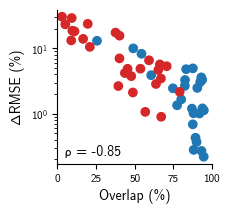

In [14]:
fig, ax = plt.subplots(figsize=(2, 2))

x = np.concatenate([
    dH["warm"],
    dH["melt"]
]) * 100

y = np.concatenate([
    (df["Force_Pct_Warm"] - df["Force_Pct"]),
    (df["Force_Pct_Melt"] - df["Force_Pct"]),
])

labels = np.concatenate([
    dH.index,
    dH.index
])

colors = np.concatenate([
    np.zeros_like(dH["warm"]),
    np.ones_like(dH["melt"])
])

ax.scatter(x, y, c=colors, cmap="tab10", vmin=0, vmax=3)

# for el, xs, ys in zip(labels, x, y):
#     ax.annotate(el, (xs, ys))
    
r = stats.pearsonr(x, y)
ax.annotate(f"ρ = {r.statistic:.2f}", (0.05, 0.05), xycoords="axes fraction")

ax.set_yscale("log")
ax.set_xlim(0, 100)

ax.set_xlabel("Overlap (%)")
ax.set_ylabel("ΔRMSE (%)")
# savefig(fig, "05-tm23-corr-extrap.pdf", prefix=PREFIX)
plt.show()

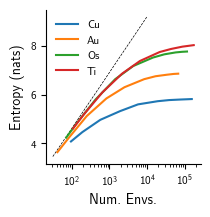

In [15]:
elements = ["Cu", "Au", "Os", "Ti"]

fig, ax = plt.subplots(figsize=(2, 2))

x = np.logspace(1.5, 4)
ax.plot(x, np.log(x), "k--", linewidth=0.5, zorder=-1)

for el in elements:
    data = lcv.loc[lcv["element"] == el].sort_values("n_samples").iloc[:-1]
    max_H = data["max_H"].iloc[0]
    
    ax.plot(data["n_samples"], data["H"], label=el)
    # ax.plot([x[0], data["n_samples"].iloc[-1]], [max_H, max_H], "--")

ax.set_xscale("log")
ax.set_ylabel("Entropy (nats)")
ax.set_xlabel("Num. Envs.")

ax.legend(frameon=False)
# savefig(fig, "05-tm23-lcv.pdf", prefix=PREFIX)
plt.show()

## Supp. Info Tables

In [16]:
RENAMER = {
    "element": "Element",
    "2700cwm": "Full Dataset",
    "melt": "Cold → Melt",
    "warm": "Cold → Warm",
}
table = (dH * 100).reset_index().sort_values("element")[["element", "2700cwm", "warm", "melt"]].rename(columns=RENAMER).set_index("Element")

In [17]:
print(table.to_latex(float_format="%.1f"))

\begin{tabular}{lrrr}
\toprule
 & Full Dataset & Cold → Warm & Cold → Melt \\
Element &  &  &  \\
\midrule
Ag & 99.6 & 89.3 & 48.9 \\
Au & 98.4 & 87.0 & 47.8 \\
Cd & 98.0 & 93.2 & 67.2 \\
Co & 97.0 & 83.3 & 37.7 \\
Cr & 95.4 & 87.6 & 9.4 \\
Cu & 99.5 & 87.5 & 45.5 \\
Fe & 95.8 & 82.5 & 19.8 \\
Hf & 94.8 & 54.5 & 3.2 \\
Hg & 97.3 & 87.6 & 67.0 \\
Ir & 99.8 & 94.6 & 63.8 \\
Mn & 98.9 & 90.5 & 65.3 \\
Mo & 96.6 & 88.0 & 11.2 \\
Nb & 95.3 & 82.4 & 40.2 \\
Ni & 99.4 & 91.8 & 43.7 \\
Os & 98.5 & 93.6 & 66.3 \\
Pd & 99.3 & 88.1 & 39.5 \\
Pt & 99.5 & 93.8 & 53.8 \\
Re & 97.9 & 25.8 & 9.1 \\
Rh & 99.5 & 94.7 & 59.3 \\
Ru & 98.6 & 93.0 & 70.7 \\
Ta & 96.0 & 60.7 & 16.8 \\
Tc & 98.5 & 92.3 & 79.1 \\
Ti & 95.1 & 74.7 & 21.1 \\
V & 94.8 & 77.4 & 9.9 \\
W & 99.0 & 90.0 & 40.3 \\
Zn & 97.2 & 80.1 & 56.9 \\
Zr & 93.5 & 49.1 & 5.3 \\
\bottomrule
\end{tabular}



## Supp. Info. Figures

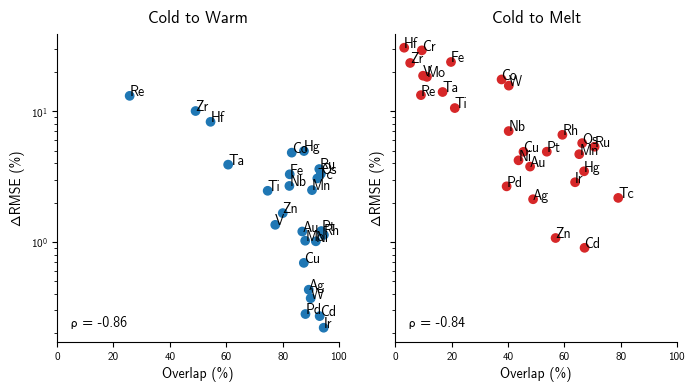

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax = axs[0]

x = np.concatenate([
    dH["warm"],
    # dH["melt"]
]) * 100

y = np.concatenate([
    (df["Force_Pct_Warm"] - df["Force_Pct"]),
    # (df["Force_Pct_Melt"] - df["Force_Pct"]),
])

labels = np.concatenate([
    dH.index,
    # dH.index
])

colors = np.concatenate([
    np.zeros_like(dH["warm"]),
    # np.ones_like(dH["melt"])
])

ax.scatter(x, y, c=colors, cmap="tab10", vmin=0, vmax=3)

for el, xs, ys in zip(labels, x, y):
    ax.annotate(el, (xs, ys))
    
r = stats.pearsonr(x, y)
ax.annotate(f"ρ = {r.statistic:.2f}", (0.05, 0.05), xycoords="axes fraction")

ax.set_yscale("log")
ax.set_xlim(0, 100)

ax.set_xlabel("Overlap (%)")
ax.set_ylabel("ΔRMSE (%)")
ax.set_title("Cold to Warm")

## Melt
ax = axs[1]
x = np.concatenate([
    # dH["warm"],
    dH["melt"]
]) * 100

y = np.concatenate([
    # (df["Force_Pct_Warm"] - df["Force_Pct"]),
    (df["Force_Pct_Melt"] - df["Force_Pct"]),
])

labels = np.concatenate([
    # dH.index,
    dH.index
])

colors = np.concatenate([
    # np.zeros_like(dH["warm"]),
    np.ones_like(dH["melt"])
])

ax.scatter(x, y, c=colors, cmap="tab10", vmin=0, vmax=3)

for el, xs, ys in zip(labels, x, y):
    ax.annotate(el, (xs, ys))
    
r = stats.pearsonr(x, y)
ax.annotate(f"ρ = {r.statistic:.2f}", (0.05, 0.05), xycoords="axes fraction")

ax.set_yscale("log")
ax.set_xlim(0, 100)

ax.set_xlabel("Overlap (%)")
ax.set_ylabel("ΔRMSE (%)")
ax.set_title("Cold to Melt")
# savefig(fig, "05-tm23-overlaps.pdf", prefix=PREFIX)
plt.show()

Correlations between data points

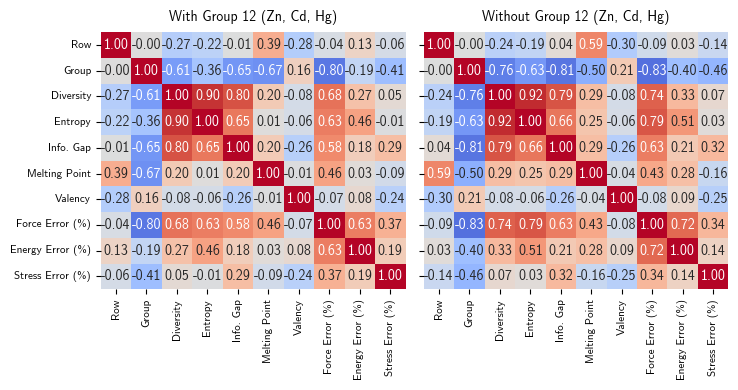

In [19]:
cols = {
    "row": "Row",
    "group": "Group",
    "diversity": "Diversity",
    "entropy": "Entropy",
    "gap": "Info. Gap",
    "Melting_Point": "Melting Point",
    "Valency": "Valency",
    "Force_Pct": "Force Error (%)",
    "Energy_Pct": "Energy Error (%)",
    "Stress_Pct": "Stress Error (%)",
}

fig, axs = plt.subplots(1, 2, figsize=(7.5, 4), sharey=True, sharex=True)

corr = df[cols.keys()].rename(columns=cols).corr()

sns.heatmap(
    corr,
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    annot=True,
    fmt=".2f",
    cbar=False,
    # cbar_kws={"label": "Pearson Corr. Coefficient"},
    ax=axs[0],
)
axs[0].set_title("With Group 12 (Zn, Cd, Hg)", fontsize=10)

corr = df.drop(["Zn", "Cd", "Hg"])[cols.keys()].rename(columns=cols).corr()
sns.heatmap(
    corr,
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    annot=True,
    fmt=".2f",
    cbar=False,
    # cbar_kws={"label": "Pearson Corr. Coefficient"},
    ax=axs[1],
)
axs[1].set_title("Without Group 12 (Zn, Cd, Hg)", fontsize=10)

fig.tight_layout()

# savefig(fig, "05-tm23-corr.pdf", prefix=PREFIX)
plt.show()

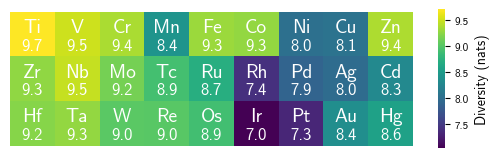

In [20]:
matrix = df.sort_values(["row", "group"])["diversity"].values.reshape(3, 9)
fig, ax = plot_table(matrix, cbar_label="Diversity (nats)")

# savefig(fig, "05-tm23-diversity-table.pdf", prefix=PREFIX)

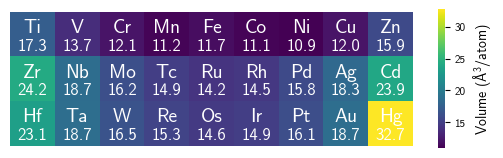

In [21]:
matrix = vols["vol"].values.reshape(3, 9)
fig, ax = plot_table(matrix, cbar_label="Volume (Å$^3$/atom)")

# savefig(fig, "05-tm23-volume-table.pdf", prefix=PREFIX)

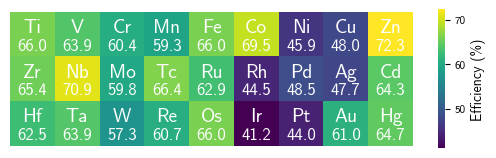

In [22]:
matrix = df.sort_values(["row", "group"])["efficiency"].values.reshape(3, 9)
fig, ax = plot_table(matrix, cbar_label="Efficiency (%)")

# savefig(fig, "05-tm23-efficiency-table.pdf", prefix=PREFIX)

## Learning curves

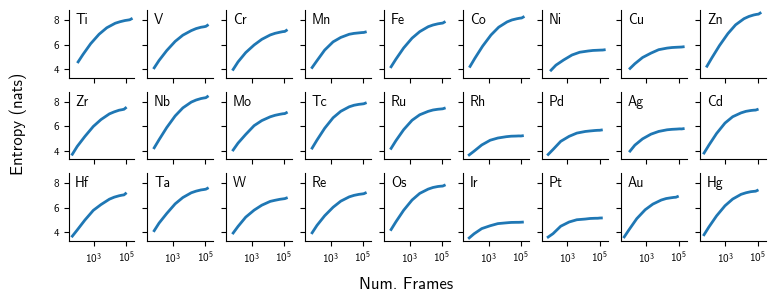

In [23]:
fig, axs = plt.subplots(3, 9, figsize=(9, 3), sharex=True, sharey=True)

for element, row in nequip.iterrows():
    i, j = int(row["row"] - 4), int(row["group"] - 4)
    ax = axs[i, j]
    _df = lcv.loc[lcv["element"] == element]

    ax.plot(_df["n_samples"], _df["H"], linewidth=2.0)
    ax.annotate(element, (0.1, 0.95), xycoords="axes fraction", va="top", fontsize=10)
    ax.set_xscale("log")

fig.supxlabel("Num. Frames", y=-0.06)
fig.supylabel("Entropy (nats)", x=0.06)

# savefig(fig, "05-tm23-learning.pdf", prefix="../../../figs")
plt.show()

## Comparing the fitted learning curve to the actual learning curves

In [24]:
def fn(x, a, b, c):
    z = np.log(x)
    return a - b * np.exp(-c * z ** 2)

max_H = {}
preds = {}
for element, grp in lcv.groupby("element"):
    _x = grp["n_samples"]
    _y = grp["H"]
    params, _ = curve_fit(
        fn, _x.iloc[3:-1], _y.iloc[3:-1],
        p0=[_y.iloc[-1], _y.iloc[-1], 0.1],
        bounds=(0, np.inf),
    )
    preds[element] = fn(_x.values, *params)
    max_H[element] = fn(1e12, *params)

max_H = pd.Series(max_H)

lcv["max_H"] = max_H.loc[lcv["element"]].values
lcv["gap"] = lcv["max_H"] - lcv["H"]

lcv["preds"] = np.nan
for element, grp in lcv.groupby("element"):
    lcv.loc[grp.index, "preds"] = preds[element]

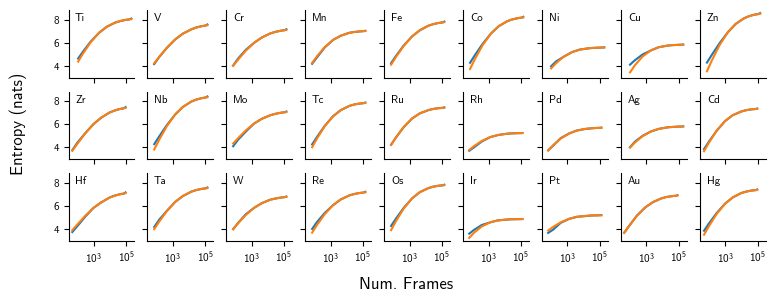

In [25]:
fig, axs = plt.subplots(3, 9, figsize=(9, 3), sharex=True, sharey=True)

for element, row in nequip.iterrows():
    i, j = int(row["row"] - 4), int(row["group"] - 4)
    ax = axs[i, j]
    _df = lcv.loc[lcv["element"] == element]

    ax.plot(_df["n_samples"], _df["H"])
    ax.plot(_df["n_samples"], preds[element])
    ax.annotate(element, (0.1, 0.95), xycoords="axes fraction", va="top", fontsize=8)
    ax.set_xscale("log")

fig.supxlabel("Num. Frames", y=-0.06)
fig.supylabel("Entropy (nats)", x=0.06)
plt.show()